# Predicting Median house prices

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F6D80CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F72A6CF8>]], dtype=object)

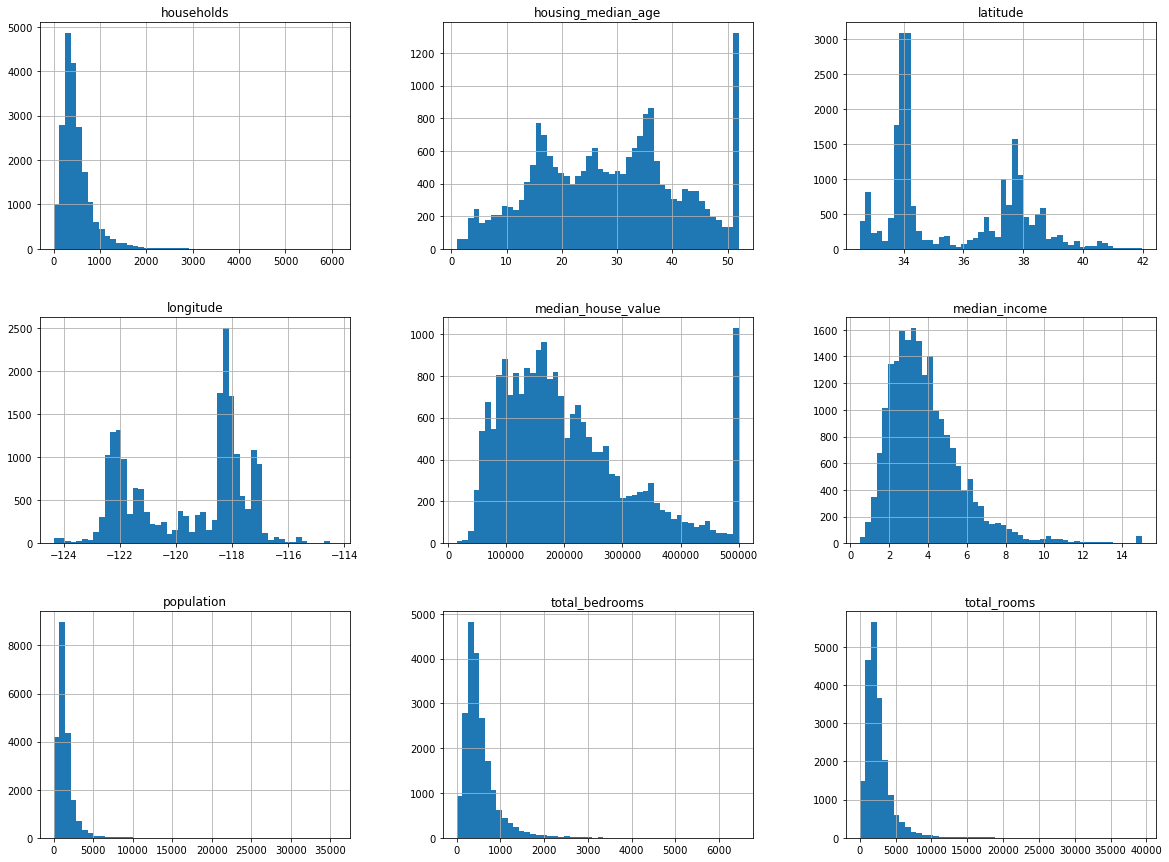

In [7]:
housing.hist(bins=50,figsize=(20,15))

In [8]:
#create a test set
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
train_set,test_set=split_train_test(housing,0.2)

In [10]:
print(len(train_set),len(test_set))

16512 4128


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#using sklearn
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [13]:
#categorise the median_income values
housing['income_cat']=np.ceil(housing['median_income']/1.5)
f = lambda x:np.where(x>5,5.0,x)
housing['income_cat']=housing['income_cat'].apply(f)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


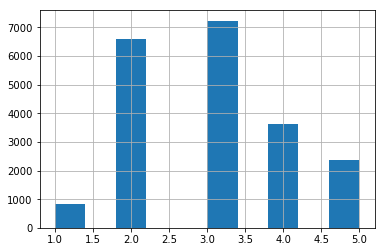

In [14]:
housing['income_cat'].hist()

In [15]:
#stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
#drop the income_cat columnn
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

### Discover and visualize data to gain insights

In [17]:
#making a copy of training set
housing_train = strat_train_set.copy()

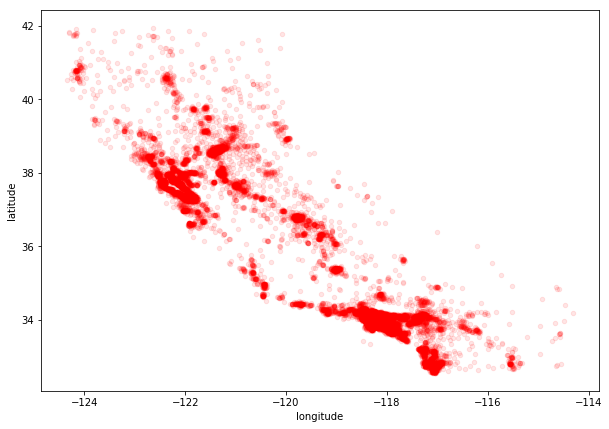

In [18]:
#visualizing geographical data
housing_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(10,7),color='r')

The dark points indicate high density areas

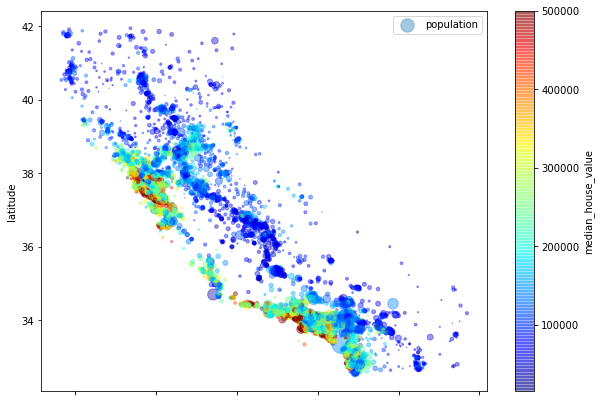

In [19]:
#plot for housing prices along with population
housing_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing_train['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

### Correlations

In [20]:
corr_matrix=housing_train.corr()

In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1F80C4B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C1FA456048>]], dtype=object)

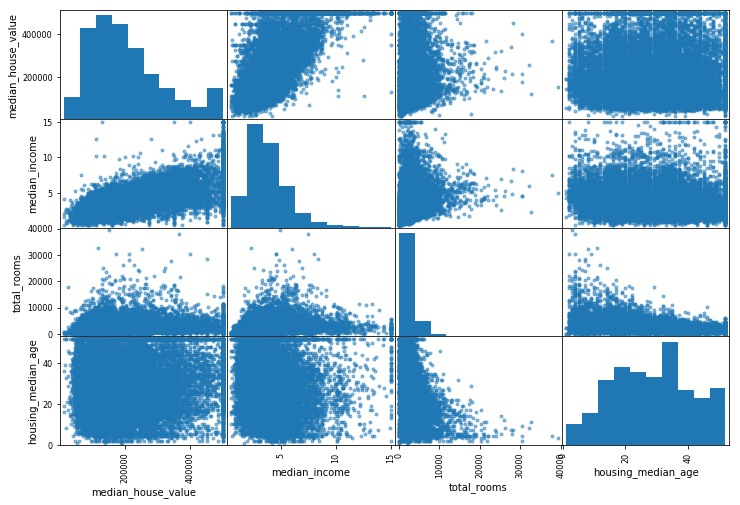

In [22]:
#scatter matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
pd.scatter_matrix(housing[attributes],figsize=(12,8))

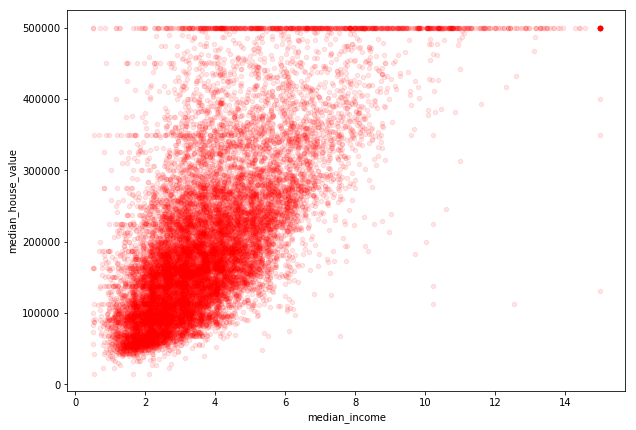

In [23]:
housing_train.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,figsize=(10,7),color='r')

There are a lot of horizontal lines at 50,000$,45,000$,35,000$ and so on.We need to remove these

### Experimenting with Attribute combinations

In [24]:
housing_train['rooms_per_household'] = housing_train['total_rooms']/housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms']/housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population']/housing_train['households']

In [25]:
corr_matrix=housing_train.corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Data Cleaning

In [27]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

for taking care of the missing values in total_bedrooms we have three options
1. Get rid of corresponding districts
2. Get rid of whole attribute.
3. Set the values to some value(zero,the median,etc)

In [28]:
#housing.dropna(subset=['total_bedrooms']) option 1
#housing.drop('total_bedrooms',axis=1) option 2
#median = housing['total_bedrooms'].median()
#housing['total_bedrooms'].fillna(median,inplace=True) option 3

For third option Sckit-learn provides a handy class to take care of missing values:IMPUTER

In [29]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [30]:
#median can be computed only in numerical attributes so we need to remove text attribute ocean_proximity
housing_num = housing.drop('ocean_proximity',axis=1)

In [31]:
#fit the imputer instance to the training data using fit()
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [32]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [33]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [34]:
#transform the training set by replacing missing values with learned medians:
x = imputer.transform(housing_num) #result is a numpy array
housing_tr = DataFrame(x,columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling text and categorical attributes

In [35]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [36]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [37]:
#convert to dummy variables using Sckit-learns OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#fit_transform takes 2D array,but housing_cat_encoded is 1D
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))#-1 means not specified take length of array
housing_cat_1hot #sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [39]:
#all of the two above steps can be done using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=False)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformers

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [41]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [42]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

### Feature Scaling

Min-Max scaling ('normalization')-> Sklearn transformer MinMaxScaler,
 mean-variance scaling ('standardization')->Sklearn transformer StandardScaler

### Transformation pipelines

pipelines are used to combine several transformations into one right order.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#converting the numerical attributes
num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),#the names can be anything except "_"
    ('std_scaler',StandardScaler())
])

In [44]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

Sckitlearn cannot handle pandas data frame so it needs to be converted to numpy array

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [46]:
#pipelines to handle both categorical and numerical attributes
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

In [47]:
#combining the two using FeatureUnion.It runs parallely the two pipelines and finally concatenates them
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [48]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
housing_prepared.shape

(16512, 16)

### Select and train a Model

In [50]:
#training and evaluating on the training set

In [51]:
#running a multilinear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [53]:
print("predictions:",lin_reg.predict(some_data_prepared))

predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [54]:
print("labels:",list(some_labels))

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [57]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It seems that our model has overfitted the data

### Using Cross-Validation

In [58]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

Sckit learns cross validation expect a ulility function(greater is better) rather than a cost function (lower is better)
that is why it gives opposite of MSE(negative values) so we put - sign in scores

In [59]:
#creating a function to display scores,mean scores,std deviation
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation",scores.std())

In [60]:
display_scores(tree_rmse_scores)

Scores: [ 70202.80584642  64976.89236712  69602.87733221  68857.88943829
  71724.43419853  74807.66743623  71791.92046726  70841.09705976
  77273.3290916   68966.44470067]
Mean: 70904.5357938
Standard deviation 3202.00450917


The scores of decison tree suggests that it is not good at all

In [61]:
#lets do the same for linear regression model
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [62]:
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation 2731.6740018


The score for linear regression model seems to be much better than Decision Tree

In [63]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [64]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22506.703189097181

In [65]:
#cross validation for random forest
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [66]:
display_scores(forest_rmse_scores)

Scores: [ 51937.29710788  50410.63393272  52807.12738534  55297.22776758
  54254.66075558  56566.73828643  51558.28951043  51019.91754528
  55583.49399019  52328.40801468]
Mean: 53176.3794296
Standard deviation 2006.44064372


In [67]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

### Fine-Tune your Model

In [72]:
#Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
            ]

In [73]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [75]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [76]:
#show the results for gridsearch
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63193.1120304 {'max_features': 2, 'n_estimators': 3}
55655.9580463 {'max_features': 2, 'n_estimators': 10}
53069.4893584 {'max_features': 2, 'n_estimators': 30}
60102.0684583 {'max_features': 4, 'n_estimators': 3}
52733.6370391 {'max_features': 4, 'n_estimators': 10}
50534.7487649 {'max_features': 4, 'n_estimators': 30}
58983.745253 {'max_features': 6, 'n_estimators': 3}
52445.9771456 {'max_features': 6, 'n_estimators': 10}
50065.2857596 {'max_features': 6, 'n_estimators': 30}
58880.9199151 {'max_features': 8, 'n_estimators': 3}
52404.9866817 {'max_features': 8, 'n_estimators': 10}
50154.8723679 {'max_features': 8, 'n_estimators': 30}
61824.8479946 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54499.9750218 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60268.2996663 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52592.3326543 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58946.8220054 {'bootstrap': False, 'max_features': 4, 'n_estima

#Randomized search
A number of random combinations is tried out at each iteration 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

### Analyze the Best Models and their Errors

In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.69244814e-02,   6.85824226e-02,   4.19086010e-02,
         1.65589201e-02,   1.61725003e-02,   1.69172585e-02,
         1.61985979e-02,   3.48687578e-01,   5.12660605e-02,
         1.08379962e-01,   7.34582370e-02,   7.49167142e-03,
         1.49587723e-01,   8.37192179e-05,   3.70631495e-03,
         4.07595205e-03])

In [89]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.348687577524185, 'median_income'),
 (0.14958772317360183, 'INLAND'),
 (0.10837996240571218, 'pop_per_hhold'),
 (0.076924481385262936, 'longitude'),
 (0.073458237016814837, 'bedrooms_per_room'),
 (0.068582422551150823, 'latitude'),
 (0.051266060545155548, 'rooms_per_hhold'),
 (0.041908600957194217, 'housing_median_age'),
 (0.016917258468799712, 'population'),
 (0.01655892013628121, 'total_rooms'),
 (0.016198597924819303, 'households'),
 (0.016172500282100367, 'total_bedrooms'),
 (0.0074916714153189989, '<1H OCEAN'),
 (0.0040759520461216741, 'NEAR OCEAN'),
 (0.0037063149495497162, 'NEAR BAY'),
 (8.3719217931766291e-05, 'ISLAND')]

Here for ocean proximity only one attribue seems to perform good

### Evaluate your system on the test set

In [110]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)
final_predictions = final_model.predict(z_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [111]:
final_rmse

64924.306116909705

In [112]:
z_test_prepared.shape

(4128, 16)